# Auto Scout Project

**Author:** Mark Joslin

**GitHub:** [link](https://github.com/mjoslin-ai/Magnimind-Project-Auto-Scout)

**Phase 1:** Data Cleaning

<a id="toc"></a>
## Table of Contents

* [Objective](#objective)
* [Features](#features)
* [Libraries](#libraries)
* [Import Data](#import-data)
* [Data Cleaning](#data-cleaning)
* [Export Data](#export-data)

<a id="objective"></a>
## Objective
[Back to Table of Contents](#toc)

Clean and preprocess a 2019 online vehicle dataset (≈15,919 rows, 54 columns, 9 car models) containing many inconsistent, broken, and messy values, so it becomes suitable for machine learning. The project is broken up into four main phases: 

1. Data Cleaning: 
    * Removing broken, irrelevant, or redundant columns
    * Creating new columns with clean, meaningful, and usable values
2. Missing Value Analysis:
    * Filling in the gabs where data is missing
    * With techniques such as mean, median, or mode
3. Outlier Analysis:
    * Outliers are detected and visualized using boxplots and histograms.
    * Rather than removing all outliers (since extreme but valid values are expected for certain car models, e.g. luxury vehicles with high prices or powerful engines), the focus is on identifying and addressing only clear misprints or logically inconsistent entries.
4. Dummy Variable Analysis:
    * Categorical and multi-label columns (e.g. Comfort_Convenience, Extras) are converted to numeric format to create binary indicator variables suitable for machine learning.
    * Key techniques include pd.get_dummies() and str.get_dummies(sep=",")

This notebook will cover Phase 1 Data Cleaning and output phase1_cleaned_data.csv.

<a id="features"></a>
## Features
[Back to Table of Contents](#toc)

**General Columns**
* url: url of dfs
* short_description, description: Description of dfs (in English and German) written by users

**Categorical Columns**
* make_model, make, model: Model of dfs. Ex:Audi A1
* body_type, body: Body type of dfs Example: van, sedans
* vat: VAT deductible, price negotiable
* registration, first_registration: First registration date and year of dfs.
* prev_owner, previous_owners: Number of previous owners
* type: new or used
* next_inspection, inspection_new: information about inspection (inspection date,..)
* body_color, body_color_original: Color of df Ex: Black, red
* paint_type: Paint type of df Ex: Metallic, Uni/basic
* upholstery: Upholstery information (texture, color)
* gearing_type: Type of gear Ex: dfmatic, manual
* fuel : fuel type Ex: diesel, benzine
* co2_emission, emission_class, emission_label: emission information
* drive_chain: drive chain Ex: front,rear, 4WD
* consumption: consumption of df in city, country and combination (lt/100 km)
* country_version
* entertainment_media
* safety_security
* comfort_convenience
* extras

**Quantitative Columns**
* price: Price of cars
* km: km of dfs
* hp: horsepower of dfs (kW)
* displacement: displacement of dfs (cc)
* warranty: warranty period (month)
* weight: weight of df (kg)
* nr_of_doors: number of doors
* nr_of_seats : number of seats
* cylinders: number of cylinders
* gears: number of gears

<a id="libraries"></a>
## Libraries
[Back to Table of Contents](#toc)

In [266]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)

<a id="import-data"></a>
## Import Data
[Back to Table of Contents](#toc)

In [267]:
df_org = pd.read_json("scout_car.json", lines=True)
df = df_org.copy()
df.head(3).T

,0,1,2
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,"56,013 km","80,000 km","83,450 km"
registration,01/2016,03/2017,02/2016
prev_owner,2 previous owners,NaN,1 previous owner
kW,NaN,NaN,NaN


In [268]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  str    
 1   make_model                     15919 non-null  str    
 2   short_description              15873 non-null  str    
 3   body_type                      15859 non-null  str    
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  str    
 6   km                             15919 non-null  str    
 7   registration                   15919 non-null  str    
 8   prev_owner                     9091 non-null   str    
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  str    
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null   object 
 1

### Standardize Columns

In [269]:
df.columns.str.replace(' ', '_').str.lower().str.replace('_&', '_').str.replace('.', '').str.replace('\n', '')

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kw', 'hp', 'type',
       'previous_owners', 'next_inspection', 'inspection_new', 'warranty',
       'full_service', 'non-smoking_vehicle', 'null', 'make', 'model',
       'offer_number', 'first_registration', 'body_color', 'paint_type',
       'body_color_original', 'upholstery', 'body', 'nr_of_doors',
       'nr_of_seats', 'model_code', 'gearing_type', 'displacement',
       'cylinders', 'weight', 'drive_chain', 'fuel', 'consumption',
       'co2_emission', 'emission_class', 'comfort__convenience',
       'entertainment__media', 'extras', 'safety__security', 'description',
       'emission_label', 'gears', 'country_version', 'electricity_consumption',
       'last_service_date', 'other_fuel_types', 'availability',
       'last_timing_belt_service_date', 'available_from'],
      dtype='str')

In [270]:
df.columns = df.columns.str.replace(' ', '_').str.lower().str.replace('_&', '_').str.replace('.', '').str.replace('\n', '')

<a id="data-cleaning"></a>
## Data Cleaning
[Back to Table of Contents](#toc)

### url

In [271]:
# url is metadata, so it can be dropped
df.drop(columns=['url'], inplace=True)

### make_model

In [272]:
df['make_model'].value_counts(dropna=False)

make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

In [273]:
df['model'].value_counts(dropna=False)

model
[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: count, dtype: int64

In [274]:
df['make'].value_counts(dropna=False)

make
\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: count, dtype: int64

In [275]:
df['make_model'].str.split(' ', expand=True)[0].value_counts(dropna=False)

0
Opel       7343
Audi       5712
Renault    2864
Name: count, dtype: int64

In [276]:
df['make'] = df['make_model'].str.split(' ', expand=True)[0].value_counts(dropna=False)
df['model'] = df['make_model'].str.split(' ', expand=True)[1].value_counts(dropna=False)

In [277]:
# drop make_model
df.drop(columns=['make_model'], inplace=True)

### description

In [278]:
df['description'].head()

0    [\n, Sicherheit:,  , Deaktivierung für Beifahr...
1    [\nLangstreckenfahrzeug daher die hohe Kilomet...
2    [\n, Fahrzeug-Nummer: AM-95365,  , Ehem. UPE 2...
3    [\nAudi A1: , - 1e eigenaar , - Perfecte staat...
4    [\n, Technik & Sicherheit:, Xenon plus, Klimaa...
Name: description, dtype: object

In [279]:
df.drop(columns=['description'], inplace=True)

### short_description

In [280]:
df['short_description'].head()

0          Sportback 1.4 TDI S-tronic Xenon Navi Klima
1                                       1.8 TFSI sport
2    Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
3                              1.4 TDi Design S tronic
4    Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
Name: short_description, dtype: str

In [281]:
# extract engine displacement (in liters) from description
df['short_description'].str.findall('\d\.\d').str[0].astype(float).value_counts(dropna=False)

short_description
NaN    5068
1.6    3891
1.4    2535
1.0    1334
1.2     957
1.5     890
2.0     888
1.3     135
1.8      60
0.9      49
4.0      28
2.5      21
4.3       9
5.7       8
5.0       3
5.5       3
1.7       3
1.1       3
9.8       2
3.0       2
0.8       2
3.9       2
6.0       2
7.8       1
8.8       1
9.6       1
2.2       1
0.3       1
0.7       1
8.9       1
8.4       1
2.3       1
6.1       1
7.9       1
4.5       1
5.6       1
7.3       1
5.3       1
0.2       1
5.1       1
4.6       1
2.8       1
4.2       1
0.0       1
0.6       1
8.5       1
9.9       1
Name: count, dtype: int64

In [282]:
df['sd_displacement'] = df['short_description'].str.findall('\d\.\d').str[0].astype(float)

In [283]:
# Convert sd_displacement from liters to cc
df['sd_displacement_cc'] = df['sd_displacement'] * 1000

In [284]:
df.drop(columns=['sd_displacement'], inplace=True)

### displacement

In [285]:
df['displacement'].value_counts(dropna=False)

displacement
[\n1,598 cc\n]    4761
[\n999 cc\n]      2438
[\n1,398 cc\n]    1314
[\n1,399 cc\n]     749
[\n1,229 cc\n]     677
                  ... 
[\n54 cc\n]          1
[\n1,100 cc\n]       1
[\n1,333 cc\n]       1
[\n1,580 cc\n]       1
[\n1,800 cc\n]       1
Name: count, Length: 78, dtype: int64

In [286]:
df['displacement'].str[0].str.replace(',','').str.findall('\d+').str[0].astype('float').value_counts(dropna=False)

displacement
1598.0    4761
999.0     2438
1398.0    1314
1399.0     749
1229.0     677
          ... 
54.0         1
1100.0       1
1333.0       1
1580.0       1
1800.0       1
Name: count, Length: 78, dtype: int64

In [287]:
df['displacement_cc'] = df['displacement'].str[0].str.replace(',','').str.findall('\d+').str[0].astype('float')
df['displacement_cc'].isna().sum()

np.int64(496)

Believe the main displacement field unless it looks physically implausible for a car engine, in which case fall back to the value extracted from the possible human written short description.

In [288]:
df['displacement_cc'].where(
    df['displacement_cc'].between(700, 4000, inclusive='neither'),
    df['sd_displacement_cc']
).value_counts(dropna=False)

displacement_cc
1598.0    4761
999.0     2438
1398.0    1314
1399.0     749
1229.0     677
          ... 
890.0        1
1100.0       1
1333.0       1
1580.0       1
1800.0       1
Name: count, Length: 73, dtype: int64

In [289]:
df['displacement_cc'] = df['displacement_cc'].where(
    df['displacement_cc'].between(700, 4000, inclusive='neither'),
    df['sd_displacement_cc']
)

print(df['displacement_cc'].isna().sum())
print("displacement_cc missing values filled with short_description:", 496-df['displacement_cc'].isna().sum())

213
displacement_cc missing values filled with short_description: 283


In [290]:
df.drop(columns=['short_description', 'sd_displacement_cc', 'displacement'], inplace=True)

### body_type

In [291]:
df['body_type'].value_counts(dropna=False)

body_type
Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: count, dtype: int64

In [292]:
df['body'].value_counts(dropna=False)

body
[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: count, dtype: int64

In [293]:
df.drop(columns=['body'], inplace=True)

### price

In [294]:
df['price'].value_counts(dropna=False)

price
14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
41480      1
41043      1
41390      1
39885      1
39875      1
Name: count, Length: 2956, dtype: int64

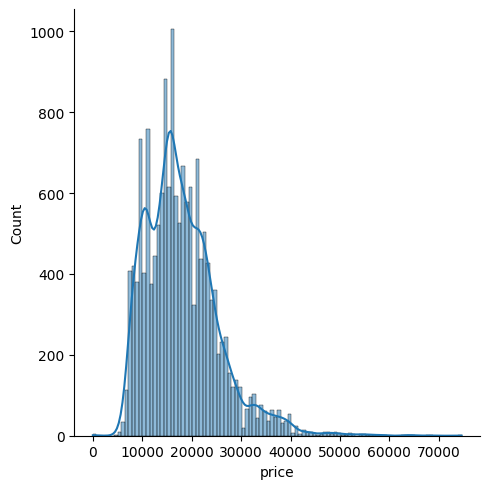

In [295]:
sns.displot(df['price'], kde=True)

### vat

In [296]:
df['vat'].value_counts(dropna=False)

vat
VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: count, dtype: int64

### km

In [297]:
df['km'].value_counts(dropna=False)

km
10 km       1045
- km        1024
1 km         367
5 km         170
50 km        148
            ... 
3,353 km       1
2,860 km       1
2,864 km       1
1,506 km       1
57 km          1
Name: count, Length: 6690, dtype: int64

In [298]:
df['km'].str.replace(',','').str.findall('\d+').str[0].astype('float').value_counts(dropna=False)

km
10.0      1045
NaN       1024
1.0        367
5.0        170
50.0       148
          ... 
3353.0       1
2860.0       1
2864.0       1
1506.0       1
57.0         1
Name: count, Length: 6690, dtype: int64

In [299]:
df['km'] = df['km'].str.replace(',','').str.findall('\d+').str[0].astype('float')

### registration

In [300]:
df['registration'].value_counts(dropna=False)

registration
-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
04/2018     541
01/2019     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2016     141
09/2018     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: count, dtype: int64

In [301]:
df['first_registration'].value_counts(dropna=False)

first_registration
[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: count, dtype: int64

age in years is calculated from first_registration and then dropped along with registration.

In [302]:
df['first_registration'].str[1].astype('Int64').value_counts(dropna=False)

first_registration
2018    4522
2016    3674
2017    3273
2019    2853
<NA>    1597
Name: count, dtype: Int64

In [303]:
df['first_registration'] = df['first_registration'].str[1].astype('Int64')
df['age_years'] = 2019 - df['first_registration'] 
df['age_years'].value_counts(dropna=False)

age_years
1       4522
3       3674
2       3273
0       2853
<NA>    1597
Name: count, dtype: Int64

In [304]:
df.drop(columns=['first_registration', 'registration'], inplace=True)

### prev_owner

In [305]:
df['prev_owner'].value_counts(dropna=False)

prev_owner
1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: count, dtype: int64

In [306]:
df['prev_owner'].str.findall('\d+').str[0].astype('Int64').value_counts(dropna=False)

prev_owner
1       8294
<NA>    6828
2        778
3         17
4          2
Name: count, dtype: Int64

In [307]:
df['prev_owner'] = df['prev_owner'].str.findall('\d+').str[0].astype('Int64')

In [308]:
df['previous_owners'].value_counts(dropna=False)  

previous_owners
\n1\n                                                                                        8101
NaN                                                                                          6640
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
                                                                                             ... 
[\n1\n, \n187 g CO2/km (comb)\n]                                                                1
[\n1\n, \n85 g CO2/km (comb)\n]                                                                 1
[\n1\n, \n, 5.9 l/100 km (comb), \n, 7.6 l/100 km (city), \n, 5.1 l/100 km (country), \n]       1
[\n2\n, \n123 g CO2/km (comb)\n]                                                                1
[\n1

In [309]:
df['previous_owners'].apply(lambda item: item[0] if type(item) == list else item).str.replace('\n', '').astype('Int64').value_counts(dropna=False)

previous_owners
1       8294
<NA>    6640
2        778
0        188
3         17
4          2
Name: count, dtype: Int64

In [310]:
df['previous_owners'] = df['previous_owners'].apply(lambda item: item[0] if type(item) == list else item).str.replace('\n', '').astype('Int64')

merge prev_owner into previous_owners due to less missing values

In [311]:
df['previous_owners'] = df['previous_owners'].fillna(df['prev_owner'])
df.drop(columns=['prev_owner'], inplace=True)
df['previous_owners'].value_counts(dropna=False)

previous_owners
1       8294
<NA>    6640
2        778
0        188
3         17
4          2
Name: count, dtype: Int64

prev_owner did not fill in any previous_owners missing values

### kw

In [312]:
df['kw'].value_counts(dropna=False)

kw
NaN    15919
Name: count, dtype: int64

In [313]:
df.drop(columns=['kw'], inplace=True)

### hp

In [314]:
df['hp'].value_counts(dropna=False)

hp
85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
          ... 
195 kW       1
123 kW       1
4 kW         1
163 kW       1
115 kW       1
Name: count, Length: 81, dtype: int64

In [315]:
df['hp'].str.findall('\d+').str[0].astype('float').value_counts(dropna=False)

hp
85.0     2542
66.0     2122
81.0     1402
100.0    1308
110.0    1112
         ... 
195.0       1
123.0       1
4.0         1
163.0       1
115.0       1
Name: count, Length: 81, dtype: int64

In [316]:
df['hp_kw'] = df['hp'].str.findall('\d+').str[0].astype('float')

### type

In [317]:
df['type'].value_counts(dropna=False)

type
[, Used, , Diesel (Particulate Filter)]                               3475
[, Used, , Diesel]                                                    2516
[, Used, , Gasoline]                                                  2367
[, Used, , Super 95]                                                  1818
[, Pre-registered, , Super 95]                                         500
                                                                      ... 
[, Pre-registered, , Super Plus 98 / Super 95 / Super Plus E10 98]       1
[, Employee's car, , Others]                                             1
[, Pre-registered, , Super E10 95 / Regular/Benzine 91]                  1
[, Pre-registered, , Super E10 95 (Particulate Filter)]                  1
[, Demonstration, , Regular/Benzine E10 91]                              1
Name: count, Length: 170, dtype: int64

extract condition (e.g., used, new) and compare remaining info to fuel column

In [318]:
df['type'].str[1].value_counts(dropna=False)

type
Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: count, dtype: int64

In [319]:
df['condition'] = df['type'].str[1].astype('str')
df['type'].str[3].value_counts(dropna=False)

type
Diesel (Particulate Filter)                     4315
Super 95                                        3338
Gasoline                                        3175
Diesel                                          2982
Super 95 / Regular/Benzine 91                    424
                                                ... 
Super 95 / Super E10 95 / Regular/Benzine 91       1
Super 95 / Super E10 95 / Super Plus 98            1
Electric                                           1
Super 95 / Super Plus 98 / Super Plus E10 98       1
Super Plus 98 / Super 95 / Super Plus E10 98       1
Name: count, Length: 78, dtype: int64

In [320]:
df['fuel_type'] = df['type'].str[3].astype('str')
df['fuel'].value_counts(dropna=False)

fuel
[\n, Diesel (Particulate Filter), \n]                     4315
[\n, Super 95, \n]                                        3338
[\n, Gasoline, \n]                                        3175
[\n, Diesel, \n]                                          2984
[\n, Super 95 / Regular/Benzine 91, \n]                    424
                                                          ... 
[\n, Super 95 / Super E10 95 / Regular/Benzine 91, \n]       1
[\n, Super 95 / Super E10 95 / Super Plus 98, \n]            1
[\n, Electric, \n]                                           1
[\n, Super 95 / Super Plus 98 / Super Plus E10 98, \n]       1
[\n, Super Plus 98 / Super 95 / Super Plus E10 98, \n]       1
Name: count, Length: 77, dtype: int64

In [321]:
print("fuel_type missing:", df['fuel_type'].isna().sum())
print("fuel missing:", df['fuel'].isna().sum())

fuel_type missing: 2
fuel missing: 0


fuel_type is same as fuel so fuel_type will be dropped

In [322]:
df.drop(columns=['type', 'fuel_type'], inplace=True)

### fuel

In [323]:
df['fuel'].str[1].str.split('/').str[0].str.strip().value_counts(dropna=False)

fuel
Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Others                                  5
Electric                                5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Others (Particulate Filter)             1
Biogas                                  1
Domestic gas H                          1
Name: count, dtype: int64

In [324]:
df['fuel'] = df['fuel'].str[1].str.split('/').str[0].str.strip()

In [325]:
df['fuel'].str.split("(").str[0].str.strip().value_counts(dropna=False)

fuel
Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: count, dtype: int64

In [326]:
df['fuel'] = df['fuel'].str.split("(").str[0].str.strip()

In [327]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "Others"]
lpg = ["LPG", "Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]

conditions = [
    df["fuel"].isin(benzine),
    df["fuel"].isin(lpg)
]

choices = ["Benzine", "LPG/CNG"]

pd.Series(np.select(conditions, choices, default=df["fuel"])).value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: count, dtype: int64

In [328]:
df['fuel'] = pd.Series(np.select(conditions, choices, default=df["fuel"])).astype('str')

### next_inspection

In [329]:
df['next_inspection'].value_counts(dropna=False)

next_inspection
NaN                                                                                                12384
\n04/2022\n                                                                                           62
\n03/2021\n                                                                                           38
\n03/2022\n                                                                                           36
\n06/2021\n                                                                                           34
                                                                                                   ...  
[\n05/2022\n, \n194 g CO2/km (comb)\n]                                                                 1
[\n06/2022\n, \n174 g CO2/km (comb)\n]                                                                 1
[\n02/2022\n, \n153 g CO2/km (comb)\n]                                                                 1
[\n06/2021\n, \n, 7.4 l/100 km (comb), 

In [330]:
def clean_next_inspection(x):
    if isinstance(x, list):
        if x:
            x = x[0]
        else:
            return x
    if isinstance(x, str):
        return x.replace('\n', '')
    return x


df['next_inspection'].apply(clean_next_inspection).value_counts(dropna=False)

next_inspection
NaN        12384
06/2021      471
03/2021      210
05/2021      180
04/2021      171
           ...  
12/2017        1
12/2022        1
01/1921        1
03/2024        1
11/2022        1
Name: count, Length: 78, dtype: int64

In [331]:
pd.to_datetime(df['next_inspection'].apply(clean_next_inspection)).dt.to_period('M').value_counts(dropna=False)

C:\Users\Mark\AppData\Local\Temp\ipykernel_18796\2612124414.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['next_inspection'].apply(clean_next_inspection)).dt.to_period('M').value_counts(dropna=False)


next_inspection
NaT        12384
2021-06      471
2021-03      210
2021-05      180
2021-04      171
           ...  
2017-12        1
2022-12        1
1921-01        1
2024-03        1
2022-11        1
Freq: M, Name: count, Length: 78, dtype: int64

In [332]:
df['next_inspection'] = pd.to_datetime(df['next_inspection'].apply(clean_next_inspection)).dt.to_period('M')

C:\Users\Mark\AppData\Local\Temp\ipykernel_18796\771990008.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['next_inspection'] = pd.to_datetime(df['next_inspection'].apply(clean_next_inspection)).dt.to_period('M')


In [333]:
# get year
# where statement prevents a substitution of -1 for NaT values
df['next_inspection'].dt.year.where(df['next_inspection'].notna()).value_counts(dropna=False)

next_inspection
NaN       12384
2021.0     1601
2020.0      694
2022.0      688
2019.0      438
2023.0       47
2018.0       38
2017.0       13
2016.0        6
2001.0        5
1999.0        1
1955.0        1
2014.0        1
1921.0        1
2024.0        1
Name: count, dtype: int64

### inspection_new

In [334]:
df['inspection_new'].value_counts(dropna=False)

inspection_new
NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n, 5.9 l/100 km (comb), \n, 7.6 l/100 km (city), \n, 5.1 l/100 km (country), \n]        1
[\nYes\n, \n, 5 l/100 km (comb), \n, 6.3 l/100 km (city), \n, 4.2 l/100 km (country), \n]          1
[\nYes\n, \n, 5 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.2 l/100 km (country), \n]          1
[\nYes\n, \n, 6.2 l/100 km (comb), \n, 7.8 l/100 km (city), \n, 5.3 l/100 km

In [335]:
df['inspection_new'].apply(lambda item: item[0] if type(item) == list else item).str.replace('\n', '').value_counts(dropna=False)

inspection_new
NaN    11987
Yes     3932
Name: count, dtype: int64

In [336]:
df['inspection_new'] = df['inspection_new'].apply(lambda item: item[0] if type(item) == list else item).str.replace('\n', '').astype('str')

### warranty

In [337]:
df['warranty'].value_counts(dropna=False)

warranty
NaN                                                                                                5420
[\n, \n, \nEuro 6\n]                                                                               1868
\n12 months\n                                                                                      1177
\n                                                                                                  979
\n24 months\n                                                                                       566
                                                                                                   ... 
[\n45 months\n, \n168 g CO2/km (comb)\n]                                                              1
\n25 months\n                                                                                         1
[\n12 months\n, \n125 g CO2/km (comb)\n]                                                              1
[\n20 months\n, \n120 g CO2/km (comb)\n]               

In [338]:
df['warranty'].apply(lambda x: x[0] if type(x) == list else x).str.strip('\n').str.split().str[0].astype('Int64').value_counts(dropna=False)

warranty
<NA>    11066
12       2594
24       1118
60        401
36        279
48        149
6         125
72         59
3          33
23         11
18         10
20          7
25          6
2           5
50          4
26          4
16          4
13          3
19          3
1           3
4           3
34          3
46          2
22          2
28          2
11          2
17          2
45          2
14          2
9           2
21          2
47          1
49          1
56          1
10          1
8           1
7           1
15          1
65          1
33          1
40          1
30          1
Name: count, dtype: Int64

In [339]:
df['warranty_months'] = df['warranty'].apply(lambda x: x[0] if type(x) == list else x).str.strip('\n').str.split().str[0].astype('Int64')

In [340]:
df.drop(columns=['warranty'], inplace=True)

### full_service

In [341]:
df['full_service'].value_counts(dropna=False)

full_service
NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
                                                                                              ... 
[\n, \n, \n, 6.6 l/100 km (comb), \n, 8.3 l/100 km (city), \n, 5.6 l/100 km (country), \n]       1
[\n, \n, \n, 6.6 l/100 km (comb), \n, 8.4 l/100 km (city), \n, 5.6 l/100 km (country), \n]       1
[\n, \n, \n, 5.9 l/100 km (comb), \n, 7.6 l/100 km (city), \n, 4.9 l/100 km (country), \n]       1
[\n, \n, \n, 5.9 l/100 km (comb), \n, 7.6 l/100 km (city), \n, 5.1 l/100 km (country), \n]      

In [342]:
df.drop(columns=['full_service'], inplace=True)

### non-smoking_vehicle

In [343]:
df['non-smoking_vehicle'].value_counts(dropna=False)

non-smoking_vehicle
NaN                                  8742
[\n, \n]                             3647
[\n, \n, \n4 (Green)\n]              1240
[\n, \n, \nEuro 6\n]                 1127
[\n, \n, \nEuro 6d-TEMP\n]            345
                                     ... 
[\n, \n, \n154 g CO2/km (comb)\n]       1
[\n, \n, \n82 g CO2/km (comb)\n]        1
[\n, \n, \n172 g CO2/km (comb)\n]       1
[\n, \n, \n161 g CO2/km (comb)\n]       1
[\n, \n, \n175 g CO2/km (comb)\n]       1
Name: count, Length: 95, dtype: int64

In [344]:
df.drop(columns=['non-smoking_vehicle'], inplace=True)

### null

In [345]:
df['null'].value_counts(dropna=False)

null
[]    15919
Name: count, dtype: int64

In [346]:
df.drop(columns=['null'], inplace=True)

### offer_number

In [347]:
df['offer_number'].value_counts(dropna=False)

offer_number
NaN                     3175
[\nJV03654\n]             27
[\nAK13780\n]             27
[\nTP62881\n]             27
[\nXT61649\n]             27
                        ... 
[\n10988301\n]             1
[\n507370_3223\n]          1
[\nEspace16\n]             1
[\n2691331\n]              1
[\nRe_30000008029\n]       1
Name: count, Length: 11441, dtype: int64

In [348]:
df.drop(columns=['offer_number'], inplace=True)

### body_color

In [349]:
df['body_color'].value_counts(dropna=False)

body_color
[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: count, dtype: int64

In [350]:
df['body_color_original'].value_counts(dropna=False)

body_color_original
NaN                                    3759
[\nOnyx Schwarz\n]                      338
[\nBianco\n]                            282
[\nMythosschwarz Metallic\n]            238
[\nBrillantschwarz\n]                   216
                                       ... 
[\nBLACK-PEARL MET.\n]                    1
[\nperlmuttweiß\n]                        1
[\nGrau - Stahl Grau\n]                   1
[\ntitaniumgraumetallic\n]                1
[\nPerlmutt-Weiß Metallic (Weiß)\n]       1
Name: count, Length: 1928, dtype: int64

In [351]:
df.drop(columns=['body_color_original'], inplace=True)

In [352]:
df['body_color'].str[1].value_counts(dropna=False)

body_color
Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: count, dtype: int64

In [353]:
df['body_color'] = df['body_color'].str[1].astype('str')

### paint_type

In [354]:
df['paint_type'].value_counts(dropna=False)

paint_type
[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: count, dtype: int64

In [355]:
df['paint_type'].str[0].str.replace('\n', '').str.lower().value_counts(dropna=False)

paint_type
metallic       9794
NaN            5772
uni/basic       347
perl effect       6
Name: count, dtype: int64

In [356]:
df['paint_type'] = df['paint_type'].str[0].str.replace('\n', '').str.lower().astype('str')

### upholstery

In [357]:
df['upholstery'].value_counts(dropna=False)

upholstery
[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nPart leather, Grey\n]      116
[\nFull leather, Brown\n]     116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nCloth, Blue\n]              12
[\nBrown\n]                    12
[\n

In [358]:
df['upholstery'].str[0].str.replace('\n', '').str.split(',', expand=True)[0].value_counts(dropna=False)

0
Cloth           8423
NaN             3720
Part leather    1499
Full leather    1009
Black            491
Other            368
Grey             273
Velour            60
alcantara         57
Brown             12
Beige              3
Blue               2
White              2
Name: count, dtype: int64

In [359]:
df['upholstery_type'] = df['upholstery'].str[0].str.replace('\n', '').str.split(',', expand=True)[0]

type_values = ['Cloth', 'Part leather', 'Full leather', 'Velour', 'alcantara']

df['upholstery_type'].where(df['upholstery_type'].isin(type_values), np.nan).value_counts(dropna=False)

upholstery_type
Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: count, dtype: int64

In [360]:
df['upholstery_type'] = df['upholstery_type'].where(df['upholstery_type'].isin(type_values), np.nan).astype('str')

In [361]:
df['upholstery'].str[0].str.replace('\n', '').str.split(',', expand=True)[1].str.strip().value_counts(dropna=False)

1
Black     7710
NaN       3720
None      2141
Grey      1103
Other      960
Brown      195
Beige       51
Blue        14
White       11
Red          9
Yellow       4
Orange       1
Name: count, dtype: int64

In [362]:
df['upholstery_color'] = df['upholstery'].str[0].str.replace('\n', '').str.split(',', expand=True)[1].str.strip()

color_values = ['Black', 'Grey', 'Brown', 'Beige', 'Blue', 'White', 'Red', 'Yellow', 'Orange']

df['upholstery_color'].where(df['upholstery_color'].isin(color_values), np.nan).value_counts(dropna=False)

upholstery_color
Black     7710
NaN       6821
Grey      1103
Brown      195
Beige       51
Blue        14
White       11
Red          9
Yellow       4
Orange       1
Name: count, dtype: int64

In [363]:
df['upholstery_color'] = df['upholstery_color'].where(df['upholstery_color'].isin(color_values), np.nan).value_counts(dropna=False)

df.drop(columns=['upholstery'], inplace=True)

### nr_of_doors

In [364]:
df['nr_of_doors'].value_counts(dropna=False)   

nr_of_doors
[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n1\n]        1
[\n7\n]        1
Name: count, dtype: int64

In [365]:
df['nr_of_doors'].str[0].str.findall('\d+').str[0].astype('Int64').value_counts(dropna=False)

nr_of_doors
5       11575
4        3079
3         832
2         219
<NA>      212
1           1
7           1
Name: count, dtype: Int64

In [366]:
df['nr_of_doors'] = df['nr_of_doors'].str[0].str.findall('\d+').str[0].astype('Int64')

### nr_of_seats

In [367]:
df['nr_of_seats'].value_counts(dropna=False) 

nr_of_seats
[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: count, dtype: int64

In [368]:
df['nr_of_seats'].str[0].str.findall('\d+').str[0].astype('Int64').value_counts(dropna=False)

nr_of_seats
5       13336
4        1125
<NA>      977
7         362
2         116
6           2
3           1
Name: count, dtype: Int64

In [369]:
df['nr_of_seats'] = df['nr_of_seats'].str[0].str.findall('\d+').str[0].astype('Int64')

### model_code

In [370]:
df['model_code'].value_counts(dropna=False)

model_code
NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n1844/ajg\n]        1
[\n1844/AIB\n]        1
[\n3333/BBL\n]        1
[\n3333/006\n]        1
[\n3333/BKG\n]        1
Name: count, Length: 233, dtype: int64

In [371]:
df.drop(columns=['model_code'], inplace=True)

### gearing_type

In [372]:
df['gearing_type'].value_counts(dropna=False)

gearing_type
[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: count, dtype: int64

In [373]:
df['gearing_type'].str[1].str.strip().astype('str').value_counts(dropna=False)

gearing_type
Manual            8153
Automatic         7297
Semi-automatic     469
Name: count, dtype: int64

In [374]:
df['gearing_type'] = df['gearing_type'].str[1].str.strip().astype('str')

### cylinders

In [375]:
df['cylinders'].value_counts(dropna=False)

cylinders
[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n8\n]       2
[\n2\n]       2
[\n1\n]       1
Name: count, dtype: int64

In [376]:
df['cylinders'].str[0].str.findall('\d+').str[0].astype('Int64').value_counts(dropna=False)

cylinders
4       8105
<NA>    5680
3       2104
5         22
6          3
8          2
2          2
1          1
Name: count, dtype: Int64

In [377]:
df['cylinders'] = df['cylinders'].str[0].str.findall('\d+').str[0].astype('Int64')

### weight

In [378]:
df['weight'].value_counts(dropna=False)

weight
NaN               6974
[\n1,163 kg\n]     574
[\n1,360 kg\n]     356
[\n1,165 kg\n]     301
[\n1,335 kg\n]     242
                  ... 
[\n1,780 kg\n]       1
[\n1,797 kg\n]       1
[\n1,939 kg\n]       1
[\n1,847 kg\n]       1
[\n2,037 kg\n]       1
Name: count, Length: 435, dtype: int64

In [379]:
df['weight'].str[0].str.replace(',','').str.findall('\d+').str[0].astype('float').value_counts(dropna=False)

weight
NaN       6974
1163.0     574
1360.0     356
1165.0     301
1335.0     242
          ... 
1780.0       1
1797.0       1
1939.0       1
1847.0       1
2037.0       1
Name: count, Length: 435, dtype: int64

In [380]:
df['weight_kg'] = df['weight'].str[0].str.replace(',','').str.findall('\d+').str[0].astype('float')
df.drop(columns=['weight'], inplace=True)

### drive_chain

In [381]:
df['drive_chain'].value_counts(dropna=False)

drive_chain
[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: count, dtype: int64

In [382]:
df['drive_chain'].str[0].str.strip().astype('str').value_counts(dropna=False)

drive_chain
front    8886
NaN      6858
4WD       171
rear        4
Name: count, dtype: int64

In [383]:
df['drive_chain'] = df['drive_chain'].str[0].str.strip().astype('str')

### consumption

In [384]:
df['consumption'].value_counts(dropna=False)

consumption
NaN                                                                                 1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]             304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]               276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]             257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]             253
                                                                                    ... 
[[7.6 l/100 km (comb)], [], []]                                                        1
[[6.8 l/100 km (comb)], [8.7 l/100 km (city)], [5.8 l/100 km (country)]]               1
[[5.4 l/100 km (comb)], [6.1 l/100 km (city)], [5 l/100 km (country)]]                 1
[[5.3 l/100 km (comb)], [6 l/100 km (city)], [5 l/100 km (country)]]                   1
[\n, 7.4 l/100 km (comb), \n, 9.6 l/100 km (city), \n, 6 l/100 km (country), \n]       1
Name: cou

In [385]:
df['consumption']

0        [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...
1        [[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...
2        [[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...
3        [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...
4        [[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...
                               ...                        
15914    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15915    [\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (ci...
15916    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15917    [[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...
15918    [[6.8 l/100 km (comb)], [8.7 l/100 km (city)],...
Name: consumption, Length: 15919, dtype: object

combination (comb)

In [386]:
def comb(a):
    if not isinstance(a, list):
        return a
    
    if len(a) <= 3:
        return a[0] if a else None  # Added a check for empty lists
        
    for i in a:
        if 'comb' in i:
            return i

df['consumption'].apply(comb).astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float).value_counts(dropna=False)

0   
NaN     2033
5.4      770
3.9      733
4.0      713
5.1      657
        ... 
32.0       1
33.0       1
50.0       1
1.0        1
46.0       1
Name: count, Length: 73, dtype: int64

In [ ]:
df['combined_l_per_100km'] = df['consumption'].apply(comb).astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float)

city

In [388]:
def city(a):
    if not isinstance(a, list):
        return a
    
    if len(a) <= 3:
        return a[1] if a else None  # Added a check for empty lists
        
    for i in a:
        if 'city' in i:
            return i

df['consumption'].apply(city).astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float).value_counts(dropna=False)

0   
NaN     2436
5.0      669
5.8      633
4.5      580
4.3      533
        ... 
10.4       1
66.0       1
16.1       1
64.0       1
9.7        1
Name: count, Length: 87, dtype: int64

In [ ]:
df['city_l_per_100km'] = df['consumption'].apply(city).astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float)

country

In [390]:
def country(a):
    if not isinstance(a, list):
        return a
    
    if len(a) <= 3:
        return a[2] if a else None  # Added a check for empty lists
        
    for i in a:
        if 'country' in i:
            return i

df['consumption'].apply(country).astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float).value_counts(dropna=False)

0   
NaN     2376
4.2     1178
3.7     1089
4.4      898
4.5      848
3.8      802
3.9      777
4.7      615
4.1      592
4.0      589
3.5      525
4.3      520
4.6      516
3.6      486
3.1      481
4.9      481
3.3      457
3.4      353
4.8      341
5.3      278
5.4      239
5.1      232
5.7      204
3.2      180
5.6      154
3.0      142
5.0      130
5.2      117
6.3       52
6.0       42
5.5       36
10.0      32
5.8       30
7.7       20
6.6       19
2.9       16
6.4       15
2.8        9
0.0        9
44.0       4
6.5        4
7.3        4
7.0        3
7.1        3
6.7        2
37.0       2
35.0       2
6.9        2
6.1        2
5.9        2
7.8        2
10.3       1
2.0        1
8.0        1
8.6        1
7.6        1
42.0       1
1.0        1
Name: count, dtype: int64

In [ ]:
df['country_l_per_100km'] = df['consumption'].apply(country).astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float)

In [394]:
df.drop(columns=['consumption'], inplace=True)

### co2_emission

In [404]:
df['co2_emission'].head(60)

0      [\n99 g CO2/km (comb)\n]
1     [\n129 g CO2/km (comb)\n]
2      [\n99 g CO2/km (comb)\n]
3      [\n99 g CO2/km (comb)\n]
4     [\n109 g CO2/km (comb)\n]
5      [\n92 g CO2/km (comb)\n]
6      [\n98 g CO2/km (comb)\n]
7      [\n97 g CO2/km (comb)\n]
8      [\n97 g CO2/km (comb)\n]
9                           NaN
10    [\n105 g CO2/km (comb)\n]
11    [\n112 g CO2/km (comb)\n]
12    [\n112 g CO2/km (comb)\n]
13                          NaN
14     [\n99 g CO2/km (comb)\n]
15     [\n97 g CO2/km (comb)\n]
16     [\n92 g CO2/km (comb)\n]
17     [\n99 g CO2/km (comb)\n]
18    [\n103 g CO2/km (comb)\n]
19     [\n99 g CO2/km (comb)\n]
20    [\n105 g CO2/km (comb)\n]
21    [\n112 g CO2/km (comb)\n]
22    [\n112 g CO2/km (comb)\n]
23     [\n97 g CO2/km (comb)\n]
24    [\n102 g CO2/km (comb)\n]
25     [\n97 g CO2/km (comb)\n]
26     [\n97 g CO2/km (comb)\n]
27     [\n97 g CO2/km (comb)\n]
28     [\n99 g CO2/km (comb)\n]
29    [\n102 g CO2/km (comb)\n]
30                          NaN
31     [

In [410]:
df['co2_emission'].astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float).value_counts(dropna=False)

0    
NaN      2436
120.0     740
99.0      545
97.0      537
104.0     501
         ... 
180.0       1
45.0        1
171.0       1
183.0       1
193.0       1
Name: count, Length: 120, dtype: int64

In [ ]:
df['emissions_g_co2/km'] = df['co2_emission'].astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float)

In [413]:
df.drop(columns=['co2_emission'], inplace=True)

### emission_class

In [415]:
df['emission_class'].value_counts(dropna=False)

emission_class
[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: count, dtype: int64

In [430]:
df['emission_class'].str[0].str.strip().replace(['Euro 6d-TEMP','Euro 6c', 'Euro 6d'], 'Euro 6').value_counts(dropna=False)

emission_class
Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: count, dtype: int64

In [431]:
df['emission_class'] = df['emission_class'].str[0].str.strip().replace(['Euro 6d-TEMP','Euro 6c', 'Euro 6d'], 'Euro 6').value_counts(dropna=False)

### emission_label

In [433]:
df['emission_label'].value_counts(dropna=False)

emission_label
NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: count, dtype: int64

In [436]:
df.drop(columns=['emission_label'], inplace=True)

### gears

In [438]:
df['gears'].value_counts(dropna=False)

gears
[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n3\n]        2
[\n4\n]        2
[\n2\n]        1
[\n50\n]       1
Name: count, dtype: int64

In [456]:
df['gears'].str[0].str.findall('\d+').str[0].astype('Int64').value_counts(dropna=False)

AttributeError: Can only use .str accessor with string values, not integer

In [447]:
df['gears'] = df['gears'].str[0].str.findall('\d+').str[0].astype('Int64')

### country_version

In [449]:
df['country_version'].value_counts(dropna=False)

country_version
NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nSwitzerland\n]          1
[\nLuxembourg\n]           1
[\nSlovenia\n]             1
[\nEgypt\n]                1
[\nSerbia\n]               1
Name: count, dtype: int64

In [457]:
df.drop(columns=['country_version'], inplace=True)

### electricity_consumption

In [458]:
df['electricity_consumption'].value_counts(dropna=False)

electricity_consumption
NaN                          15782
[\n0 kWh/100 km (comb)\n]      137
Name: count, dtype: int64

In [459]:
df.drop(columns=['electricity_consumption'], inplace=True)

### last_service_date

In [460]:
df['last_service_date'].value_counts(dropna=False)

last_service_date
NaN                                       15353
[\n02/2019\n, \nEuro 6\n]                    23
[\n05/2019\n, \nEuro 6\n]                    16
[\n03/2019\n, \nEuro 6\n]                    15
[\n01/2018\n, \n118 g CO2/km (comb)\n]       15
                                          ...  
[\n04/2017\n, \n120 g CO2/km (comb)\n]        1
[\n07/2018\n, \nEuro 6d\n]                    1
[\n05/2018\n, \n116 g CO2/km (comb)\n]        1
[\n04/2016\n, \nEuro 6\n]                     1
[\n03/2019\n, \n120 g CO2/km (comb)\n]        1
Name: count, Length: 267, dtype: int64

In [461]:
df.drop(columns=['last_service_date'], inplace=True)

### other_fuel_types

In [462]:
df['other_fuel_types'].value_counts(dropna=False)

other_fuel_types
NaN             15039
[[], [], []]      880
Name: count, dtype: int64

In [463]:
df.drop(columns=['other_fuel_types'], inplace=True)

### availability

In [464]:
df['availability'].value_counts(dropna=False)

availability
NaN                              15284
\nin 90 days from ordering\n       196
\nin 120 days from ordering\n      182
\nin 1 day from ordering\n          51
\nin 5 days from ordering\n         35
\nin 3 days from ordering\n         35
\nin 180 days from ordering\n       24
\nin 14 days from ordering\n        24
\nin 7 days from ordering\n         20
\nin 150 days from ordering\n       18
\nin 2 days from ordering\n         16
\nin 60 days from ordering\n        13
\nin 42 days from ordering\n        10
\nin 21 days from ordering\n         8
\nin 4 days from ordering\n          2
\nin 6 days from ordering\n          1
Name: count, dtype: int64

In [465]:
df.drop(columns=['availability'], inplace=True)

### last_timing_belt_service_date

In [466]:
df['last_timing_belt_service_date'].value_counts(dropna=False)

last_timing_belt_service_date
NaN                          15903
[\n04/2016\n]                    2
[\n12/1900\n]                    1
[\n07/2018\n]                    1
[\n01/1900\n]                    1
[\n05/2019\n]                    1
[\n09/2018\n]                    1
[\n05/2018\n, \nEuro 6\n]        1
[\n06/2017\n]                    1
[\n01/2019\n]                    1
[\n02/2019\n]                    1
[\n02/2018\n]                    1
[\n06/2019\n]                    1
[\n01/2018\n]                    1
[\n04/2019\n]                    1
[\n01/1970\n]                    1
Name: count, dtype: int64

In [467]:
df.drop(columns=['last_timing_belt_service_date'], inplace=True)

### available_from

In [468]:
df['available_from'].value_counts(dropna=False)

available_from
NaN             15647
\n31/08/19\n       98
\n30/07/19\n       25
\n15/08/19\n       24
\n16/09/19\n       14
\n29/06/19\n       12
\n01/07/19\n       11
\n28/06/19\n       10
\n19/08/19\n        7
\n10/09/19\n        6
\n27/06/19\n        5
\n10/11/19\n        5
\n26/06/19\n        5
\n08/07/19\n        4
\n01/08/19\n        3
\n25/10/19\n        3
\n15/07/19\n        3
\n05/08/19\n        2
\n30/06/19\n        2
\n05/07/19\n        2
\n20/07/19\n        2
\n16/07/19\n        2
\n24/08/19\n        2
\n04/07/19\n        2
\n29/07/19\n        1
\n31/10/19\n        1
\n18/07/19\n        1
\n06/12/19\n        1
\n03/12/19\n        1
\n05/12/19\n        1
\n10/12/19\n        1
\n01/09/19\n        1
\n11/08/19\n        1
\n10/10/19\n        1
\n17/08/19\n        1
\n14/09/19\n        1
\n24/09/19\n        1
\n16/08/19\n        1
\n27/07/19\n        1
\n18/08/19\n        1
\n29/09/19\n        1
\n24/07/19\n        1
\n10/07/19\n        1
\n02/07/19\n        1
\n30/09/19\n     

In [469]:
df.drop(columns=['available_from'], inplace=True)

In [470]:
df.columns

Index(['body_type', 'price', 'vat', 'km', 'hp', 'previous_owners',
       'next_inspection', 'inspection_new', 'make', 'model', 'body_color',
       'paint_type', 'nr_of_doors', 'nr_of_seats', 'gearing_type', 'cylinders',
       'drive_chain', 'fuel', 'emission_class', 'comfort__convenience',
       'entertainment__media', 'extras', 'safety__security', 'gears',
       'displacement_cc', 'age_years', 'hp_kw', 'condition', 'warranty_months',
       'upholstery_type', 'upholstery_color', 'weight_kg',
       'combined_L_per_100km', 'city_L_per_100km', 'country_L_per_100km',
       'emissions_g_co2/km'],
      dtype='str')

<a id="export-data"></a>
## Export Data
[Back to Table of Contents](#toc)